In [34]:
import pandas as pd

data = pd.read_csv("C:\\Users\\NANDAKISHORE BOINI\\OneDrive\\Desktop\\Zoo.csv")
data


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [36]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [37]:
data.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [38]:
# Calculate the IQR for each numerical feature
for column in data.select_dtypes(include=['number']):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    # Treat outliers (e.g., replace with the median)
    if not outliers.empty:
        median_value = data[column].median()
        data[column] = data[column].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

print(data)


    animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0      aardvark     1       0.0     0     1       0.0        0         1   
1      antelope     1       0.0     0     1       0.0        0         0   
2          bass     0       0.0     1     0       0.0        1         1   
3          bear     1       0.0     0     1       0.0        0         1   
4          boar     1       0.0     0     1       0.0        0         1   
..          ...   ...       ...   ...   ...       ...      ...       ...   
96      wallaby     1       0.0     0     1       0.0        0         0   
97         wasp     1       0.0     1     0       0.0        0         0   
98         wolf     1       0.0     0     1       0.0        0         1   
99         worm     0       0.0     1     0       0.0        0         0   
100        wren     0       0.0     1     0       0.0        0         0   

     toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
0          1 

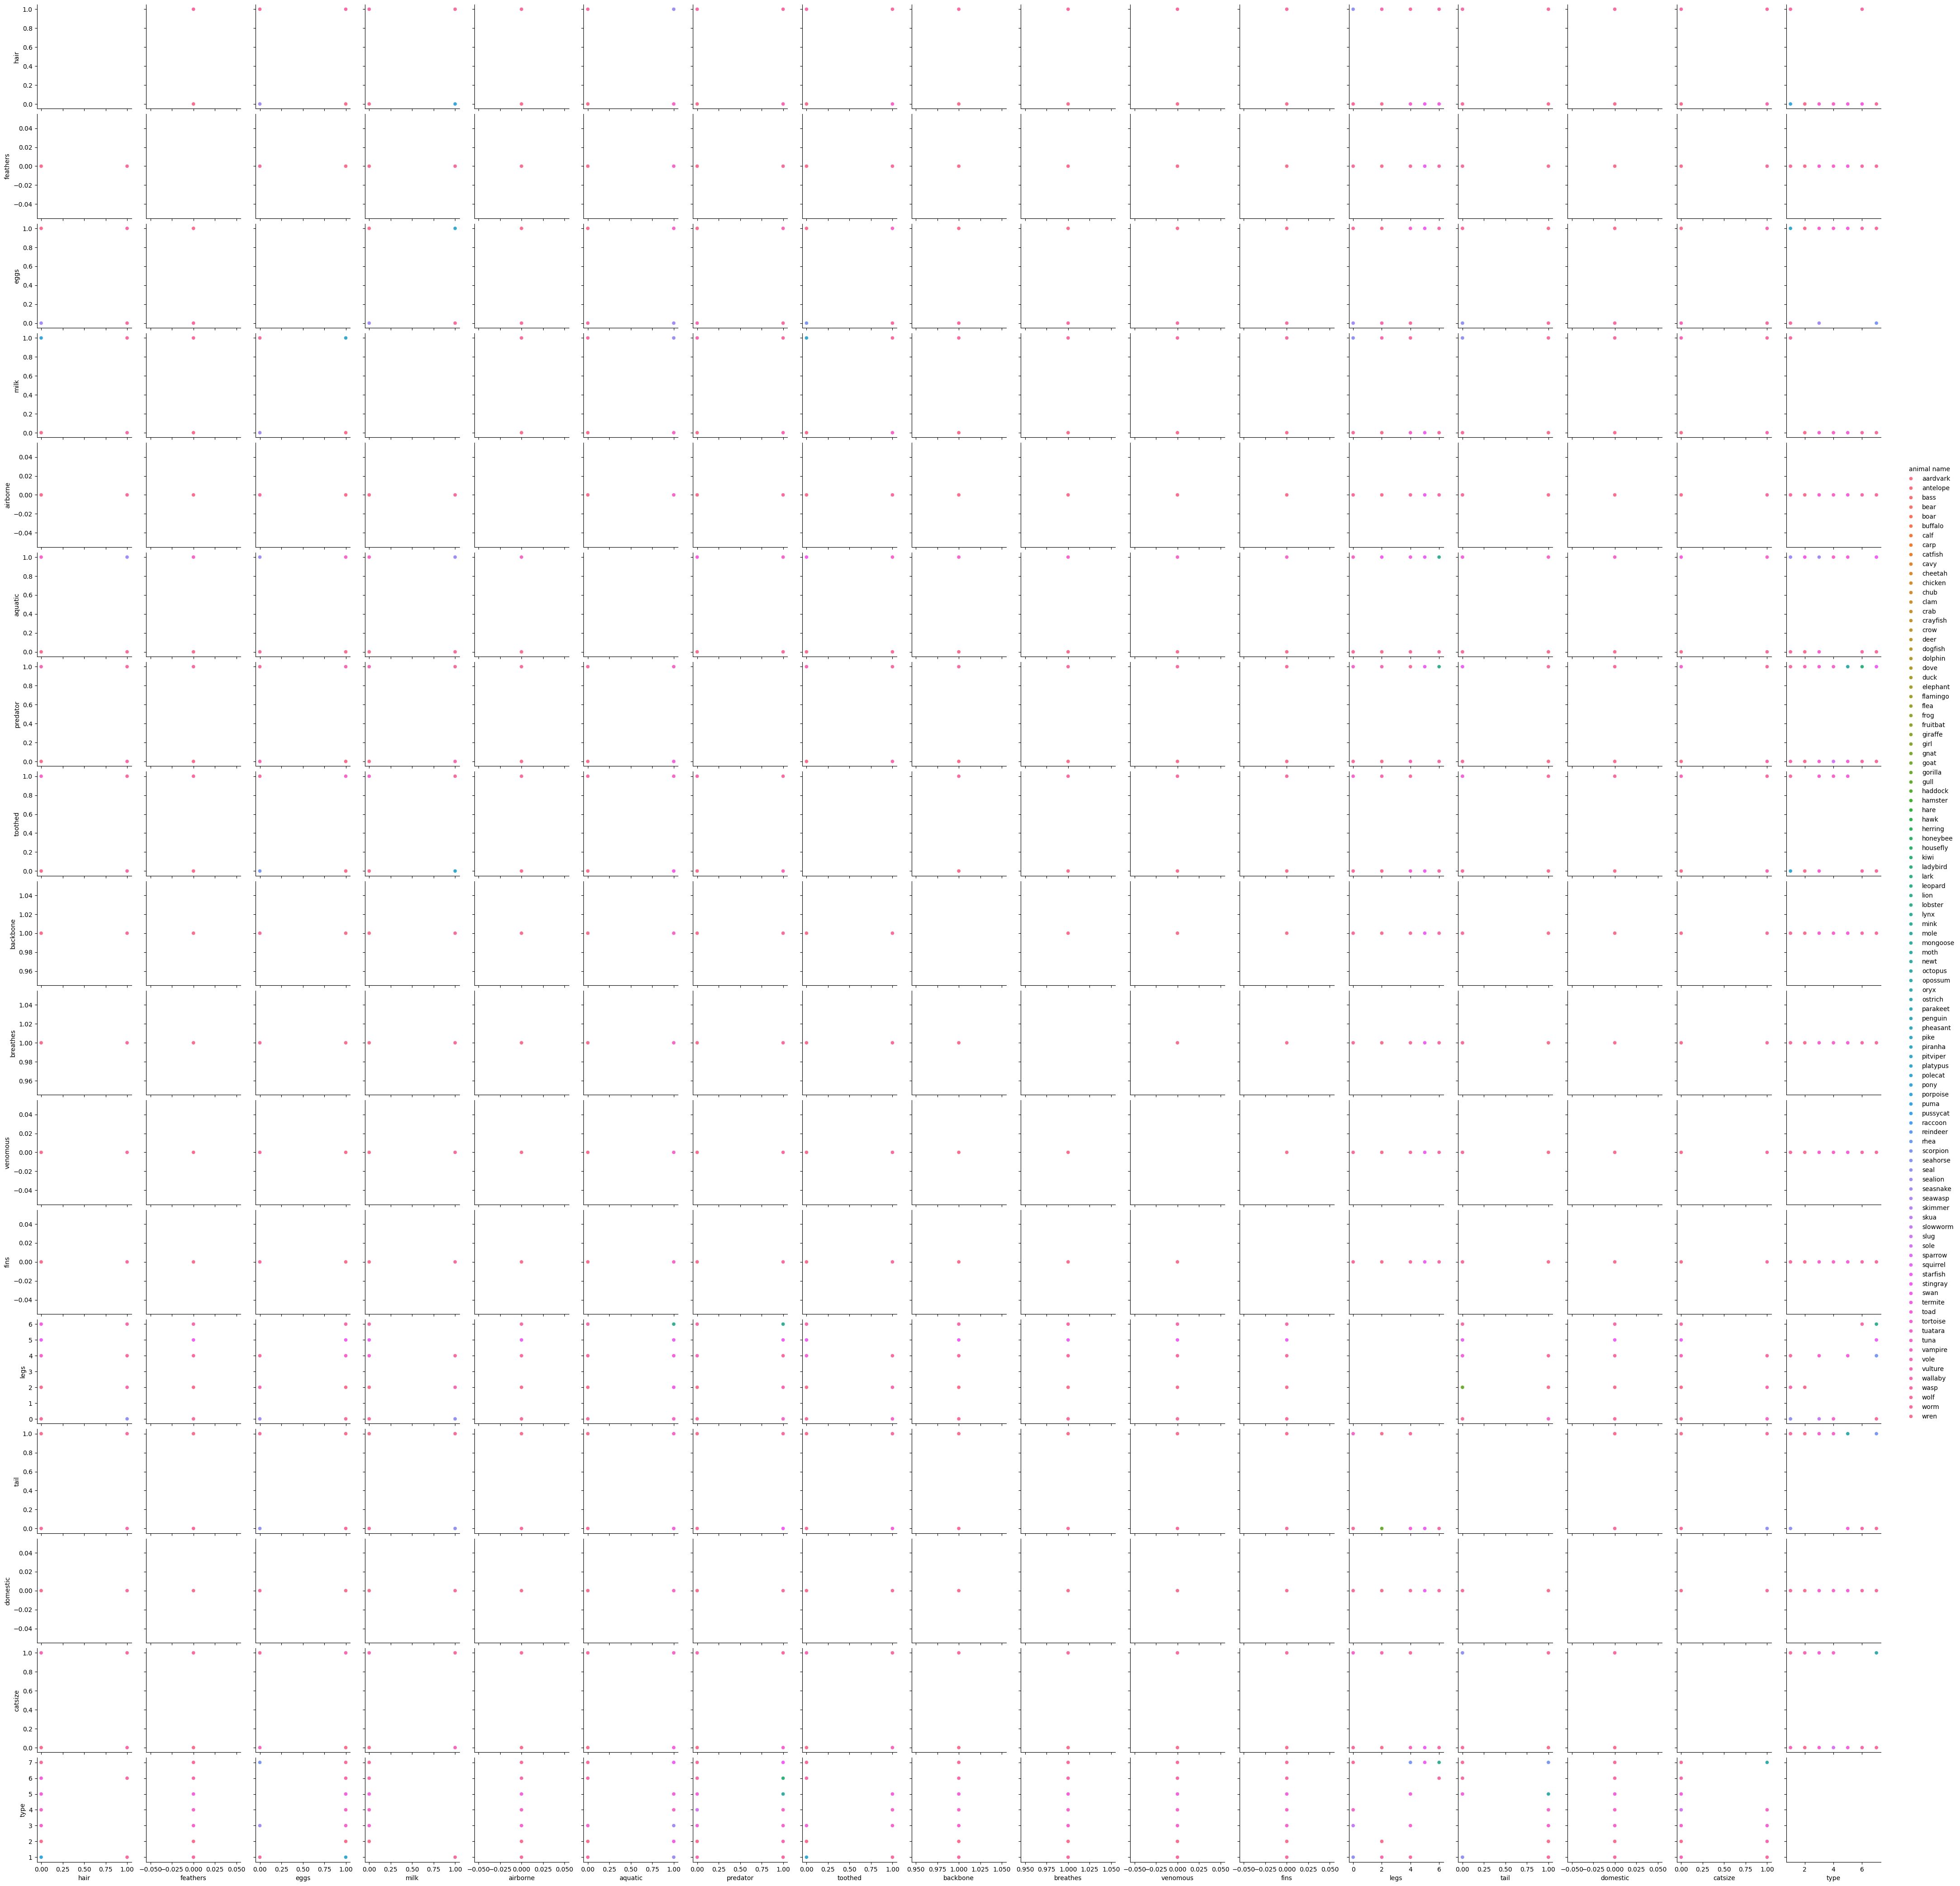

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot to visualize relationships between features
sns.pairplot(data, hue='animal name')
plt.show()

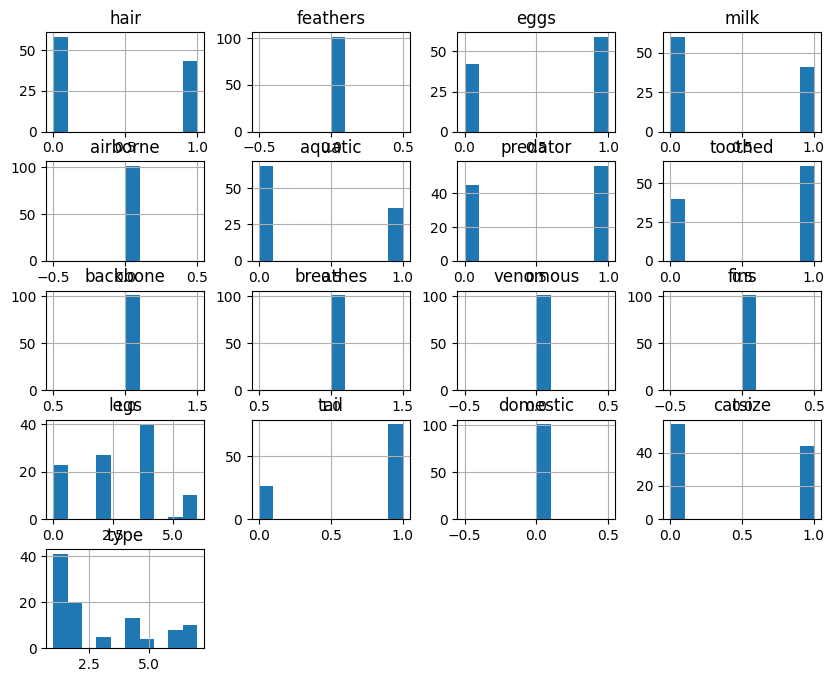

In [40]:
# Histogram for each feature to understand their distributions
data.hist(figsize=(10, 8))
plt.show()


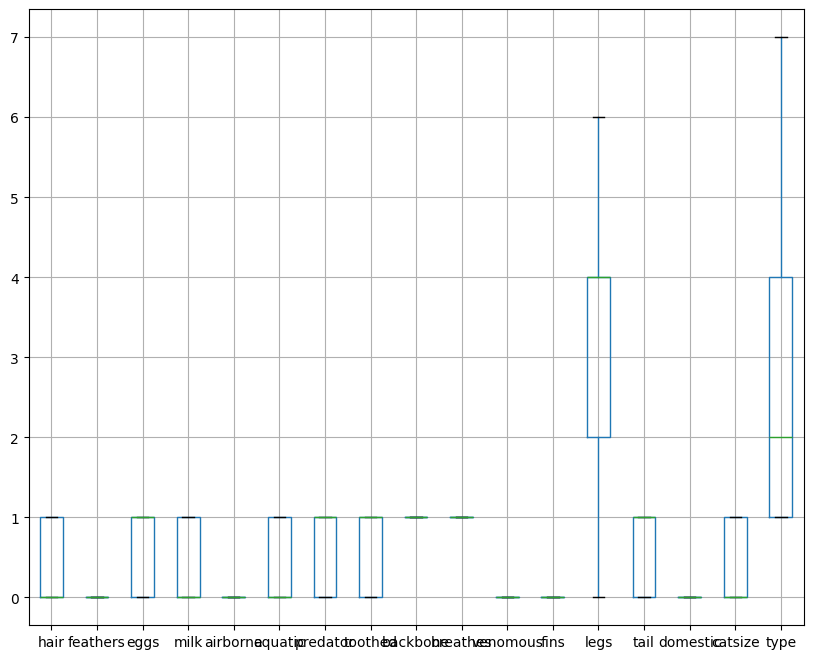

In [41]:
# Boxplot to identify outliers in each feature
data.boxplot(figsize=(10, 8))
plt.show()

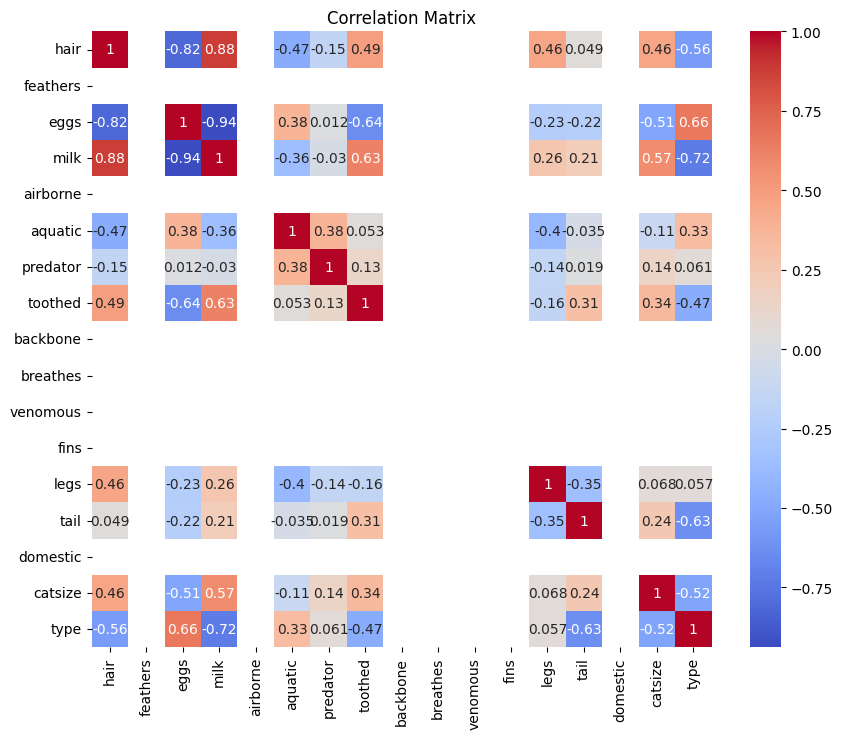

In [42]:
# Correlation matrix to identify feature correlations
correlation_matrix = data.drop('animal name', axis=1).corr() # Drop the non-numeric column 'animal name'
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

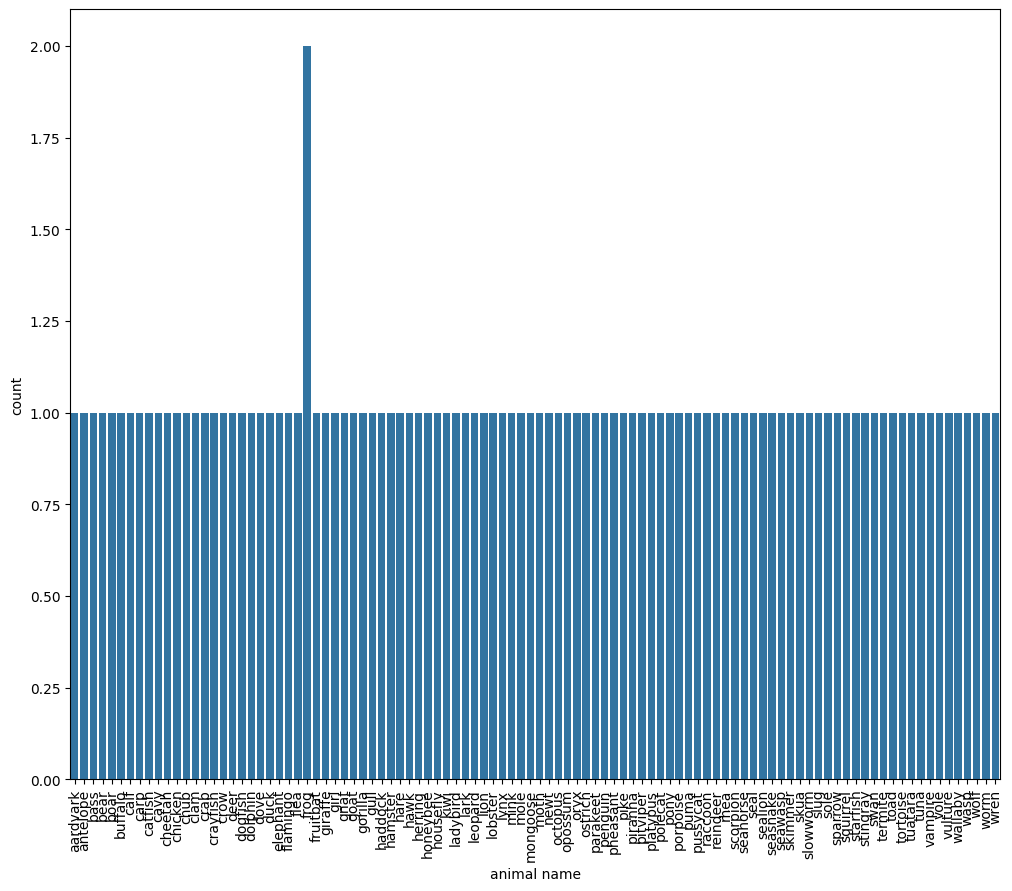

In [43]:
# Countplot of the target variable to understand class distribution
plt.figure(figsize=(12,10)) # Moved figsize to plt.figure
sns.countplot(x='animal name', data=data)
plt.xticks(rotation=90)
plt.show()

In [44]:
from sklearn.model_selection import train_test_split

# Assuming 'animal name' is your target variable
X = data.drop('animal name', axis=1)
y = data['animal name']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (80, 17)
X_test shape: (21, 17)
y_train shape: (80,)
y_test shape: (21,)


In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a K-Nearest Neighbors classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)


KNN Accuracy: 0.0


In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Experiment with different distance metrics and K values
for metric in ['euclidean', 'manhattan', 'minkowski']:
  for k in range(1, 11):  # Try K values from 1 to 10
      knn_model = KNeighborsClassifier(n_neighbors=k, metric=metric)
      knn_model.fit(X_train, y_train)
      y_pred_knn = knn_model.predict(X_test)
      accuracy_knn = accuracy_score(y_test, y_pred_knn)
      print(f"KNN Accuracy with k={k}, metric={metric}: {accuracy_knn}")

# Create the final model with the chosen K and metric
best_k = 5  # Replace with the optimal K value you found
best_metric = 'manhattan'  # Replace with the optimal metric you found
final_knn_model = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
final_knn_model.fit(X_train, y_train)


KNN Accuracy with k=1, metric=euclidean: 0.0
KNN Accuracy with k=2, metric=euclidean: 0.0
KNN Accuracy with k=3, metric=euclidean: 0.0
KNN Accuracy with k=4, metric=euclidean: 0.0
KNN Accuracy with k=5, metric=euclidean: 0.0
KNN Accuracy with k=6, metric=euclidean: 0.0
KNN Accuracy with k=7, metric=euclidean: 0.0
KNN Accuracy with k=8, metric=euclidean: 0.0
KNN Accuracy with k=9, metric=euclidean: 0.0
KNN Accuracy with k=10, metric=euclidean: 0.0
KNN Accuracy with k=1, metric=manhattan: 0.0
KNN Accuracy with k=2, metric=manhattan: 0.0
KNN Accuracy with k=3, metric=manhattan: 0.0
KNN Accuracy with k=4, metric=manhattan: 0.0
KNN Accuracy with k=5, metric=manhattan: 0.0
KNN Accuracy with k=6, metric=manhattan: 0.0
KNN Accuracy with k=7, metric=manhattan: 0.0
KNN Accuracy with k=8, metric=manhattan: 0.0
KNN Accuracy with k=9, metric=manhattan: 0.0
KNN Accuracy with k=10, metric=manhattan: 0.0
KNN Accuracy with k=1, metric=minkowski: 0.0
KNN Accuracy with k=2, metric=minkowski: 0.0
KNN Accu

KNeighborsClassifier(metric='manhattan')

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, average='weighted')  # Choose appropriate average method
recall = recall_score(y_test, y_pred_knn, average='weighted')
f1 = f1_score(y_test, y_pred_knn, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


C:\Users\NANDAKISHORE BOINI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NANDAKISHORE BOINI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [48]:

# 1. What are the key hyperparameters in KNN?

# Answer:
# The key hyperparameters in KNN are:

# - n_neighbors: The number of nearest neighbors to consider when making a prediction.
#   - A smaller value can lead to overfitting, while a larger value can lead to underfitting.
# - weights:  The weight function used in prediction. It can be:
#   - 'uniform': All neighbors have equal weight.
#   - 'distance': Closer neighbors have a greater influence on the prediction.
# - algorithm: The algorithm used to compute the nearest neighbors. Options include 'auto', 'ball_tree', 'kd_tree', and 'brute'.
#   - The choice depends on the size and dimensionality of the dataset.
# - metric: The distance metric used to calculate the distance between data points.
#   - Common metrics include Euclidean distance, Manhattan distance, Minkowski distance, etc.
# - p: The power parameter for the Minkowski metric. When p=1, it's equivalent to Manhattan distance, and when p=2, it's Euclidean distance.


# 2. What distance metrics can be used in KNN?

# Answer:
# Various distance metrics can be used in KNN, including:

# - Euclidean Distance: The most common distance metric. It calculates the straight-line distance between two points in Euclidean space.
# - Manhattan Distance: Also known as L1 distance or city block distance. It calculates the sum of the absolute differences between the coordinates of two points.
# - Minkowski Distance: A generalization of both Euclidean and Manhattan distances. It takes a parameter 'p' that controls the distance calculation.
#   - When p=1, it's Manhattan distance, and when p=2, it's Euclidean distance.
# - Hamming Distance: Used for categorical data. It calculates the number of positions at which two strings of equal length differ.
# - Cosine Similarity: Measures the cosine of the angle between two vectors. It's often used for text data or when the magnitude of the vectors is not important.


